In [102]:
# Import the machine learning libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [103]:
# Load the Air Passengers (Number of air passengers per month) dataset.
# The dataset can be downloaded here: https://www.kaggle.com/rakannimer/air-passengers.
df = pd.read_csv('AirPassengers.csv')
print(df.shape)

(144, 2)


In [104]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [105]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [106]:
df.Month = pd.to_datetime(df.Month)
df = df.set_index("Month")

In [107]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [108]:
df.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [109]:
# Split the dataset into the training set and test subsets.
train, test = df[:-12], df[-12:]
print(train.shape, test.shape)

(132, 1) (12, 1)


In [110]:
# Exponential Smoothing (Holt-Winters) for Time Series Forecasting
model = ExponentialSmoothing(train, 
                             trend='add', 
                             damped=False, 
                             seasonal='add', 
                             seasonal_periods=12).fit()

In [111]:
holt_pred = model.predict(start=test.index[0], end=test.index[-1])

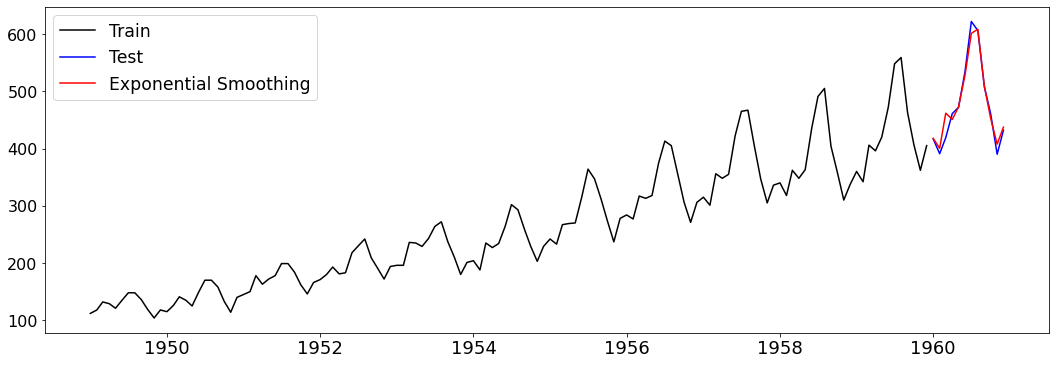

In [112]:
plt.figure(figsize=(18, 6))
plt.plot(train.index, train, label='Train', color='k')
plt.plot(test.index, test, label='Test', color='b')
plt.plot(holt_pred.index, holt_pred, label='Exponential Smoothing', color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [113]:
# Print Root Mean Square Error (RMSE) and R^2 (coefficient of determination).
pred_actual_rmse = rmse(test.values.T.squeeze(), holt_pred.values)
pred_actual_r2 = r2_score(test.values.T.squeeze(), holt_pred.values)
print("RMSE: ", pred_actual_rmse)
print("R squared: ", pred_actual_r2)

RMSE:  15.570830861607387
R squared:  0.9562321528126513
